In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline

from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
#Adding header names
header_names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue'
               , 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders' ,
               'Ascities', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
               'Histology']

In [3]:
df = pd.read_table('../datasets/hepatitis.data', sep = ',' , header = None, names = header_names)
df.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null int64
Age                155 non-null int64
Sex                155 non-null int64
Steroid            155 non-null object
Antivirals         155 non-null int64
Fatigue            155 non-null object
Malaise            155 non-null object
Anorexia           155 non-null object
Liver Big          155 non-null object
Liver Firm         155 non-null object
Spleen Palpable    155 non-null object
Spiders            155 non-null object
Ascities           155 non-null object
Varices            155 non-null object
Bilirubin          155 non-null object
Alk Phosphate      155 non-null object
Sgot               155 non-null object
Albumin            155 non-null object
Protime            155 non-null object
Histology          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


In [5]:
df.shape

(155, 20)

In [6]:
#Replace the "?" to nan so that we can trace the null value
df.replace("?",np.nan, inplace = True)
df.isnull().sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascities            5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [7]:
#Handling of Missing data
#Numerical variables
#Convert the type of numerical variables
numerical_variables = ['Age', 'Bilirubin', 'Protime', 'Albumin', 'Alk Phosphate', 'Sgot']

df["Bilirubin"] = df.Bilirubin.astype(float)
df["Protime"] = df.Protime.astype(float)
df["Alk Phosphate"] = df["Alk Phosphate"].astype(float)
df["Sgot"] = df.Sgot.astype(float)
df["Albumin"] = df.Albumin.astype(float)

#Fill empty spaces by using mean value
df[numerical_variables].fillna(df[numerical_variables].mean()).head(5)

#Categorical variables
categorical_variables = ['Sex' , 'Steroid', 'Antivirals', 'Fatigue','Malaise','Anoerxia','Liver Big','Liver Firm','Spleen Palpable',
'Spiders','Ascities','Varices', 'Histology']

#Fill in the missing data using most frequent data of each category
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mean.fit(df)
imputed_train_df = imp_mean.transform(df)
imputedDf = pd.DataFrame(imputed_train_df,columns=header_names)

In [8]:
imputedDf["Class"] = pd.to_numeric(imputedDf['Class'])
imputedDf["Age"] = pd.to_numeric(imputedDf['Age'])
imputedDf["Sex"] = pd.to_numeric(imputedDf['Sex'])
imputedDf["Steroid"] = pd.to_numeric(imputedDf['Steroid'])
imputedDf["Antivirals"] = pd.to_numeric(imputedDf['Antivirals'])

imputedDf["Fatigue"] = pd.to_numeric(imputedDf['Fatigue'])
imputedDf["Malaise"] = pd.to_numeric(imputedDf['Malaise'])
imputedDf["Anorexia"] = pd.to_numeric(imputedDf['Anorexia'])
imputedDf["Liver Big"] = pd.to_numeric(imputedDf['Liver Big'])
imputedDf["Liver Firm"] = pd.to_numeric(imputedDf['Liver Firm'])

imputedDf["Spleen Palpable"] = pd.to_numeric(imputedDf['Spleen Palpable'])
imputedDf["Spiders"] = pd.to_numeric(imputedDf['Spiders'])
imputedDf["Ascities"] = pd.to_numeric(imputedDf['Ascities'])
imputedDf["Varices"] = pd.to_numeric(imputedDf['Varices'])
imputedDf["Bilirubin"] = pd.to_numeric(imputedDf['Bilirubin'])

imputedDf["Alk Phosphate"] = pd.to_numeric(imputedDf['Alk Phosphate'])
imputedDf["Sgot"] = pd.to_numeric(imputedDf['Sgot'])
imputedDf["Histology"] = pd.to_numeric(imputedDf['Histology'])

In [9]:
# imputedDf['Sex'].replace(['1','2'],["Male", "Female"], inplace = True)
# imputedDf['Steroid'].replace(['1','2'],["!Steriod", "Steriod"], inplace = True)
# imputedDf['Antivirals'].replace(['1','2'],["!Antivirals", "Antivirals"], inplace = True)
# imputedDf['Fatigue'].replace(['1','2'],["!Fatigue", "Fatigue"], inplace = True)
# imputedDf['Malaise'].replace(['1','2'],["!Malaise", "Malaise"], inplace = True)
# imputedDf['Anorexia'].replace(['1','2'],["!Anorexia", "Anorexia"], inplace = True)
# imputedDf['Liver Big'].replace(['1','2'],["!Liver Big", "Liver Big"], inplace = True)
# imputedDf['Liver Firm'].replace(['1','2'],["!Liver Firm", "Liver Firm"], inplace = True)
# imputedDf['Spleen Palpable'].replace(['1','2'],["!Spleen Palpable", "Spleen Palpable"], inplace = True)
# imputedDf['Spiders'].replace(['1','2'],["!Spiders", "Spiders"], inplace = True)
# imputedDf['Ascities'].replace(['1','2'],["!Ascities", "Ascities"], inplace = True)

# imputedDf['Varices'].replace(['1','2'],["!Varices", "Varices"], inplace = True)
# imputedDf['Histology'].replace(['1','2'],["!Histology", "Histology"], inplace = True)
# imputedDf['Ascities'].replace(['1','2'],["!Ascities", "Ascities"], inplace = True)

# imputedDf['Bilirubin'] = 'Bilirubin' + imputedDf['Bilirubin'].astype(str)
# imputedDf['Alk Phosphate'] = 'Alk' + imputedDf['Alk Phosphate'].astype(str)
# imputedDf['Sgot'] = 'Sgot' + imputedDf['Sgot'].astype(str)
# imputedDf['Albumin'] = 'Albumin' + imputedDf['Albumin'].astype(str)
# imputedDf['Protime'] = 'Protime' + imputedDf['Protime'].astype(str)

In [10]:
imputedDf.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4,100,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,100,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4,100,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.0,200.0,4,100,1


In [11]:
# ndf = imputedDf.drop(['Protime', 'Bilirubin'], axis = 1)
data = imputedDf.copy()

In [12]:
x = data.drop("Class",axis = 1)# input data
y = data.Class.values# target data

In [13]:
x.shape,y.shape

((155, 19), (155,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of y_train=>',y_train.shape)
print('Shape of y_test=>',y_test.shape)

Shape of X_train=> (93, 19)
Shape of X_test=> (62, 19)
Shape of y_train=> (93,)
Shape of y_test=> (62,)


## Decision Tree Classifier

In [15]:
decision_tree = tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train,y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Test Accurary : ",decision_tree.score(X_test,y_test))
print("Train Accurary : ",decision_tree.score(X_train,y_train))

Test Accurary :  0.7258064516129032
Train Accurary :  1.0


In [16]:
y_pred_tree

array([2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2], dtype=int64)

In [17]:
cm_Dtree = confusion_matrix(y_test,y_pred_tree)
cr_Dtree = classification_report(y_test,y_pred_tree)
print("confusion matrix : \n",cm_Dtree)
print("classification report : \n",cr_Dtree)

confusion matrix : 
 [[ 5  9]
 [ 8 40]]
classification report : 
               precision    recall  f1-score   support

           1       0.38      0.36      0.37        14
           2       0.82      0.83      0.82        48

    accuracy                           0.73        62
   macro avg       0.60      0.60      0.60        62
weighted avg       0.72      0.73      0.72        62



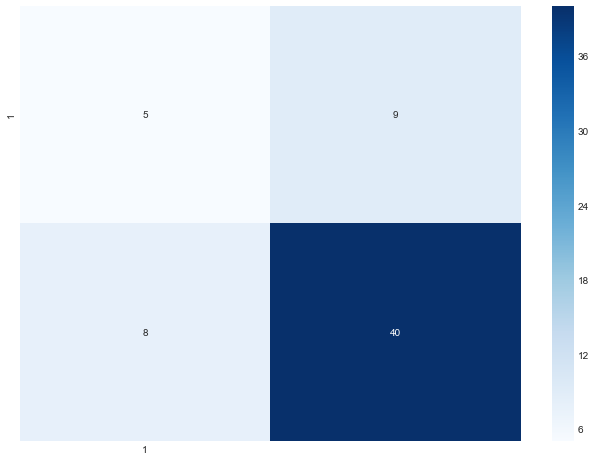

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_Dtree,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Blues")
plt.show()

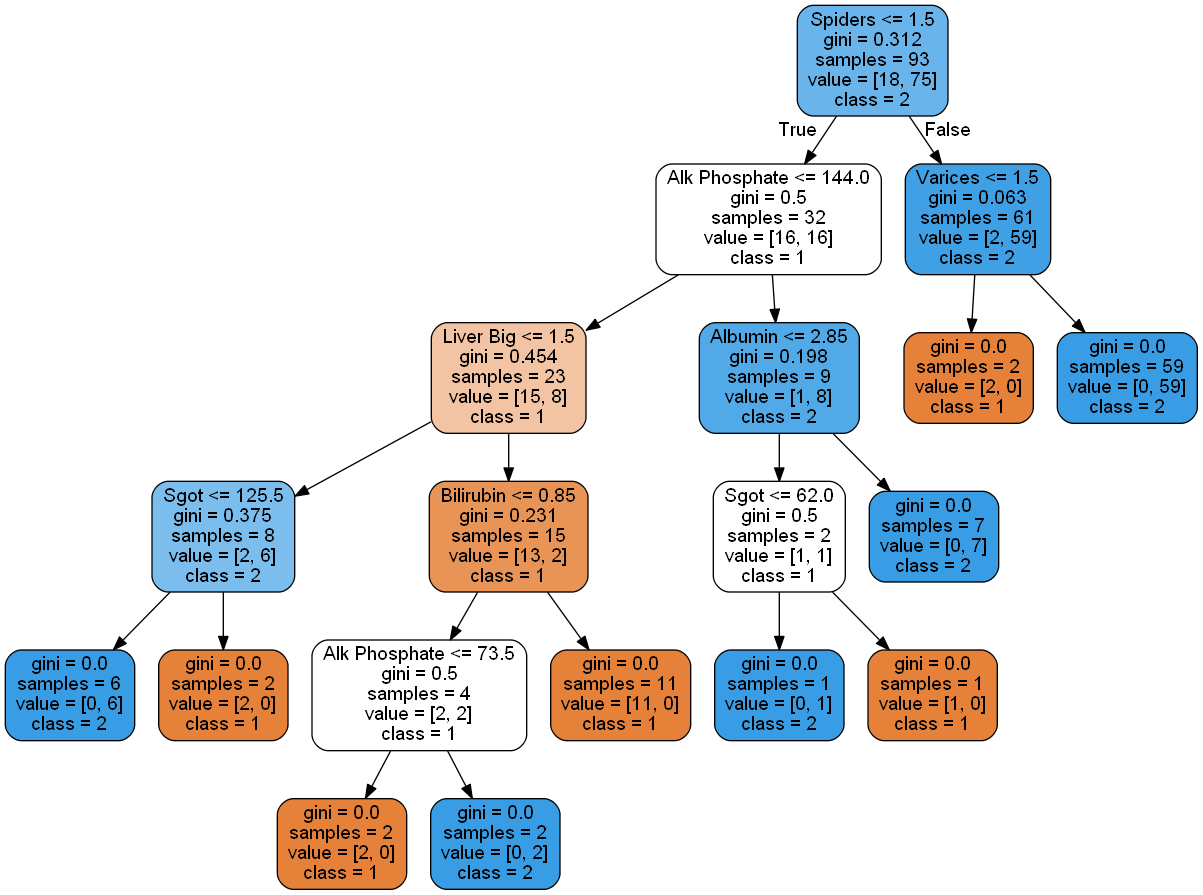

In [19]:
ddata=tree.export_graphviz(decision_tree,out_file=None,filled=True,rounded=True,
                          feature_names=['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue'
               , 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders' ,
               'Ascities', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
               'Histology'],
                          class_names=["1", "2"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## Random Forest Model

In [20]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
s_max = 0
rf_train_score_list = []
rf_test_score_list = []

for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

Best Score =  0.8387096774193549
Best n_estimators =  90


In [21]:
rf = RandomForestClassifier(n_estimators = 60,random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [22]:
y_pred_rf

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2], dtype=int64)

In [23]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cr_rf = classification_report(y_test,y_pred_rf)
print("confusion matrix : \n",cm_rf)
print("classification report : \n",cr_rf)

confusion matrix : 
 [[ 6  8]
 [ 3 45]]
classification report : 
               precision    recall  f1-score   support

           1       0.67      0.43      0.52        14
           2       0.85      0.94      0.89        48

    accuracy                           0.82        62
   macro avg       0.76      0.68      0.71        62
weighted avg       0.81      0.82      0.81        62



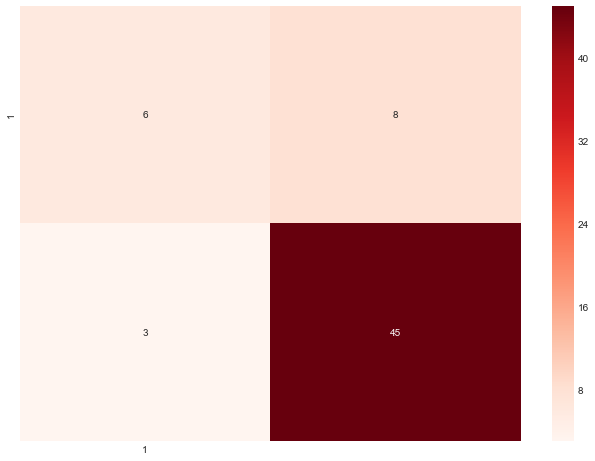

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_rf,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Reds")
plt.show()

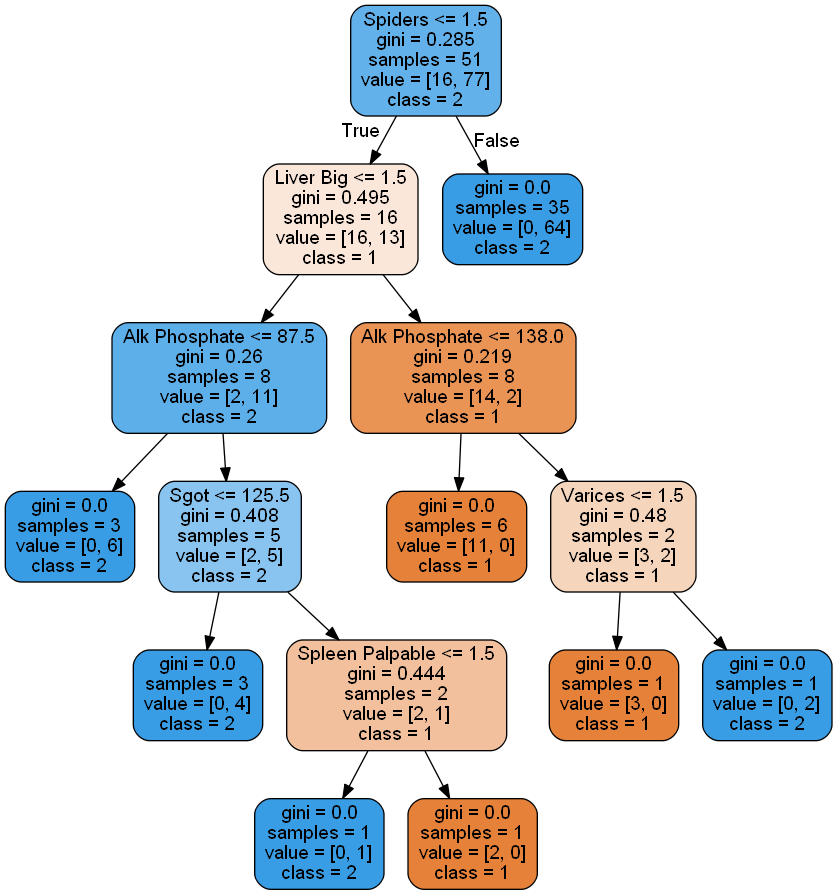

In [25]:
ddata=tree.export_graphviz(rf.estimators_[4],out_file=None,filled=True,rounded=True,
                          feature_names=['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue'
               , 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders' ,
               'Ascities', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
               'Histology'],
                          class_names=["1","2"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## SVM (Support Vector Machines)

In [26]:
from sklearn.svm import SVC

svm = SVC(random_state = 42,kernel = "linear")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("Train Accurary : ",svm.score(X_train,y_train))
print("Test Accuray : ",svm.score(X_test,y_test))

Train Accurary :  0.989247311827957
Test Accuray :  0.7419354838709677


In [27]:
y_pred_svm

array([2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2], dtype=int64)

In [28]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

confusion matrix : 
 [[ 7  7]
 [ 9 39]]
classification report : 
               precision    recall  f1-score   support

           1       0.44      0.50      0.47        14
           2       0.85      0.81      0.83        48

    accuracy                           0.74        62
   macro avg       0.64      0.66      0.65        62
weighted avg       0.76      0.74      0.75        62



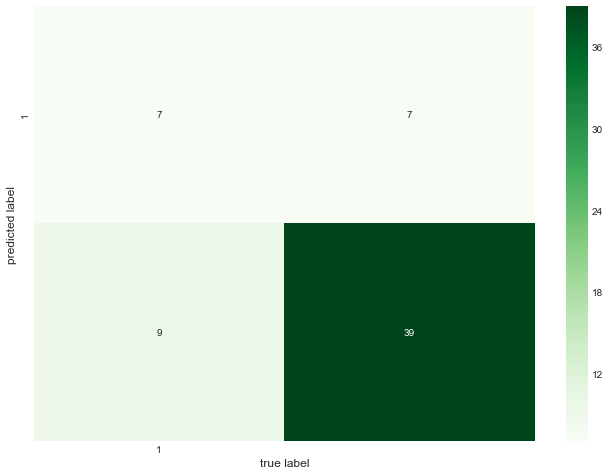

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Greens",xticklabels = np.arange(1,2),yticklabels = np.arange(1,2))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [30]:
# https://github.com/manfye/Predict-Hepatitis/blob/main/Predicting%20Hepatitis%20ML.ipynb
# https://towardsdatascience.com/predicting-hepatitis-patient-survivability-uci-dataset-71982aa6775d